This notebook will step through a descriptive statistics script about Amazon Top 50 Bestselling Books 2009 - 2019.

First, we import a lib.py file which contains functions for descriptive statistics, which will be used in both this jupyter notebook and the python script in this project.


In [1]:
import lib
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = lib.load_csv("bestsellers with categories.csv")

get the summary of this dataset

In [2]:
# 1. Summary for 2009-2019
rating_per_year = data.groupby('Year')['User Rating'].agg(['mean', 'median'])
fiction_non_fiction_count = data.groupby(['Year', 'Genre']).size().unstack(fill_value=0)
books_above_47 = data[data['User Rating'] > 4.7].groupby(['Year', 'Genre']).size().unstack(fill_value=0)
print("===== Rating Summary =====")
print(rating_per_year)
print("\n===== Fiction & Non-Fiction Book Counts =====")
print(fiction_non_fiction_count)
print("\n===== Book Counts with Rating above 4.7 =====")
print(books_above_47)

===== Rating Summary =====
       mean  median
Year               
2009  4.584    4.60
2010  4.558    4.60
2011  4.558    4.60
2012  4.532    4.60
2013  4.554    4.60
2014  4.622    4.65
2015  4.648    4.70
2016  4.678    4.70
2017  4.660    4.70
2018  4.668    4.70
2019  4.740    4.80

===== Fiction & Non-Fiction Book Counts =====
Genre  Fiction  Non Fiction
Year                       
2009        24           26
2010        20           30
2011        21           29
2012        21           29
2013        24           26
2014        29           21
2015        17           33
2016        19           31
2017        24           26
2018        21           29
2019        20           30

===== Book Counts with Rating above 4.7 =====
Genre  Fiction  Non Fiction
Year                       
2009         6            5
2010         6            1
2011         6            2
2012         5            4
2013        10            5
2014        11            5
2015        11            8
201

In [3]:
# 2. Books with highest and lowest rating across the years
highest_rated_books = data[data['User Rating'] == data['User Rating'].max()].drop_duplicates(subset=['Name', 'Author'])
lowest_rated_books = data[data['User Rating'] == data['User Rating'].min()]
print("\n===== Highest Rated Books =====")
print(highest_rated_books[['Name', 'Author', 'Genre', 'User Rating']])
print("\n===== Lowest Rated Books =====")
print(lowest_rated_books[['Name', 'Author', 'Genre', 'User Rating']])


===== Highest Rated Books =====
                                                  Name                 Author  \
40            Brown Bear, Brown Bear, What Do You See?        Bill Martin Jr.   
81   Dog Man and Cat Kid: From the Creator of Capta...             Dav Pilkey   
82   Dog Man: A Tale of Two Kitties: From the Creat...             Dav Pilkey   
83   Dog Man: Brawl of the Wild: From the Creator o...             Dav Pilkey   
85   Dog Man: Fetch-22: From the Creator of Captain...             Dav Pilkey   
86   Dog Man: For Whom the Ball Rolls: From the Cre...             Dav Pilkey   
87   Dog Man: Lord of the Fleas: From the Creator o...             Dav Pilkey   
146  Goodnight, Goodnight Construction Site (Hardco...   Sherri Duskey Rinker   
151                           Hamilton: The Revolution     Lin-Manuel Miranda   
153  Harry Potter and the Chamber of Secrets: The I...           J.K. Rowling   
155  Harry Potter and the Goblet of Fire: The Illus...          J. K. Rowlin

now we are going to do the correlation analysis.

In [4]:
# 3. Correlation: Rating vs. Reviews and Rating vs. Price
corr_rating_reviews = lib.get_correlation(data, 'User Rating', 'Reviews')
corr_rating_price = lib.get_correlation(data, 'User Rating', 'Price')
print("\n===== Correlation: Rating vs. Reviews =====")
print(f"Correlation coefficient: {corr_rating_reviews:.5f}")
print("\n===== Correlation: Rating vs. Price =====")
print(f"Correlation coefficient: {corr_rating_price:.5f}")


===== Correlation: Rating vs. Reviews =====
Correlation coefficient: -0.0017290142555501195

===== Correlation: Rating vs. Price =====
Correlation coefficient: -0.13308628728087976


The last part is about data visulization. There are 3 plots.

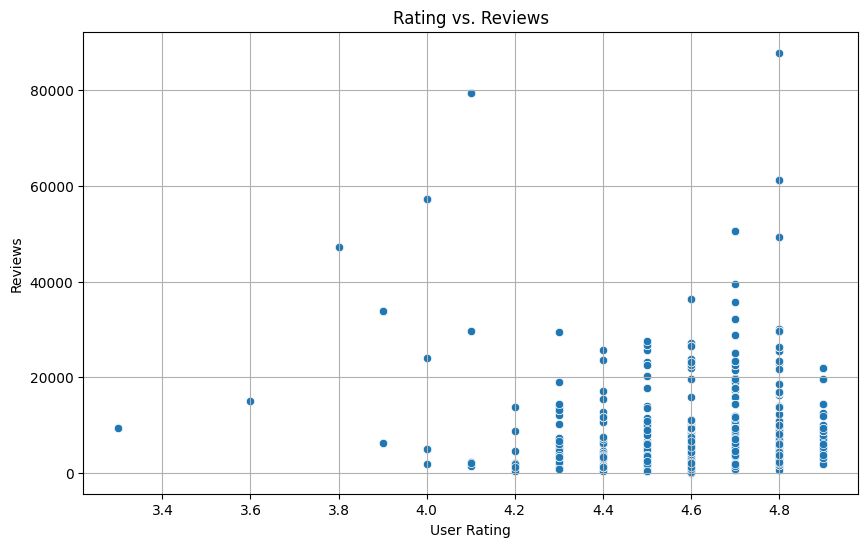

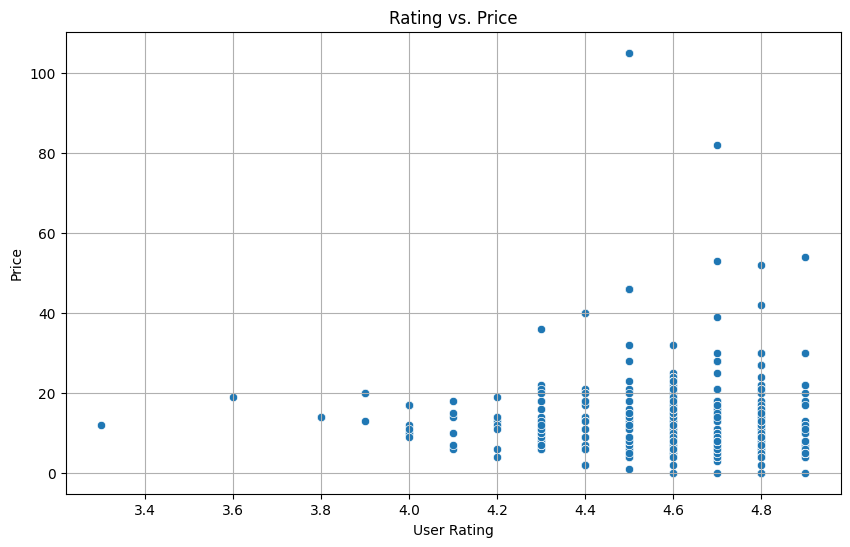

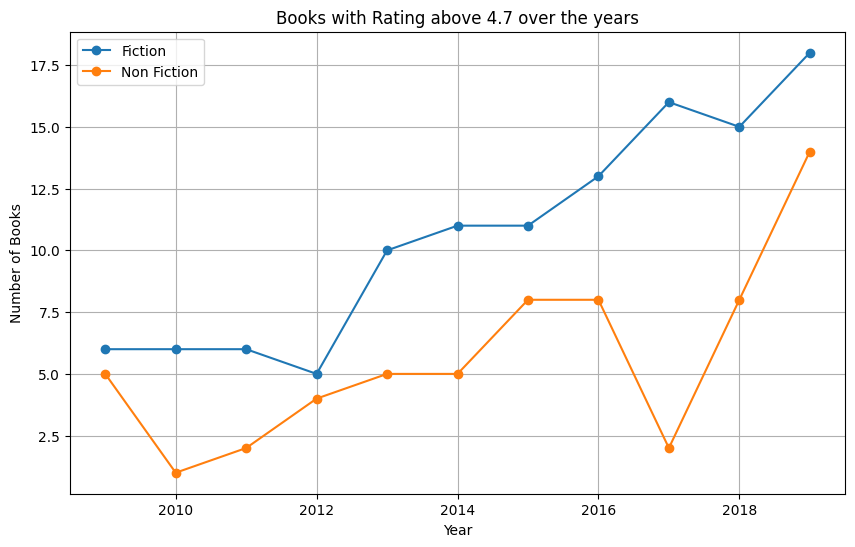

In [5]:
# Visualizations
lib.visualize_correlation(data, 'User Rating', 'Reviews', 'Rating vs. Reviews', "rating_vs_reviews.png")
lib.visualize_correlation(data, 'User Rating', 'Price', 'Rating vs. Price', "rating_vs_price.png")
lib.visualize_line_chart(books_above_47.reset_index(), 'Year', 'Fiction', 'Non Fiction', 'Books with Rating above 4.7 over the years', "books_above_47_over_years.png")